In [1]:
pip install matplotlib seaborn pandas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load Titanic dataset (You can load any other dataset in a similar way)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# View the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Get an overview of the dataset
print(df.info())

# Summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

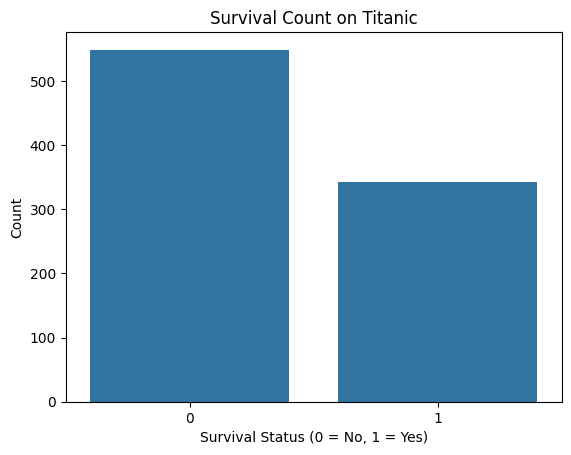

In [5]:
# Count the number of survivors vs non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count on Titanic')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


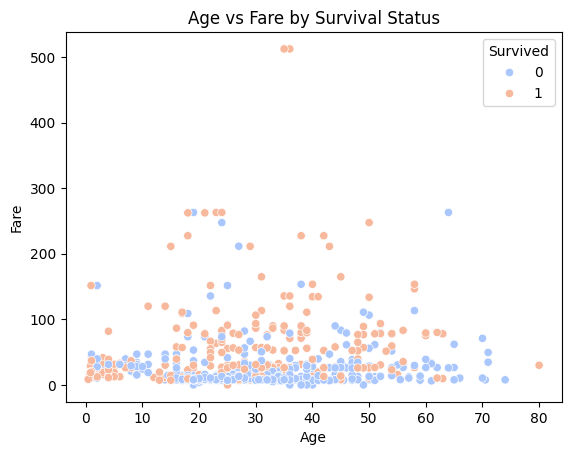

In [6]:
# Scatter plot of Age vs Fare, colored by survival status
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


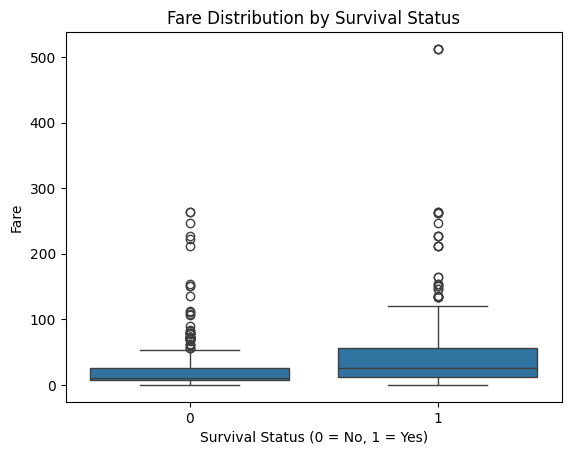

In [8]:
# Box plot of Fare based on Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()



<ipython-input-11-938cdec69fd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='coolwarm')


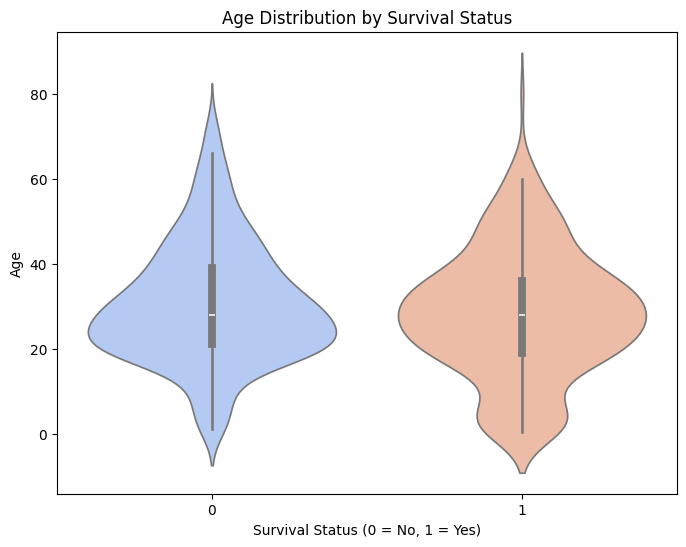

In [11]:
# Violin plot of Age distribution by Survival Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



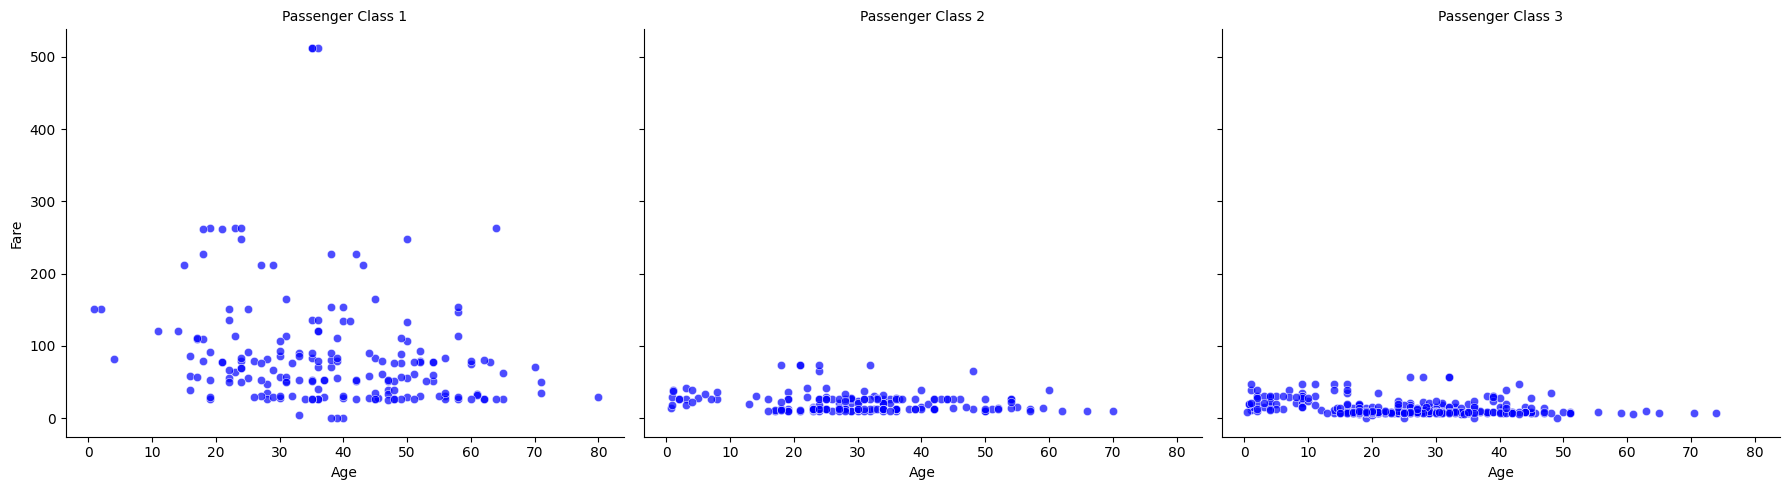

In [12]:
# Create a FacetGrid for Age vs Fare, split by Pclass (Passenger Class)
g = sns.FacetGrid(df, col="Pclass", height=5, aspect=1.2)
g.map(sns.scatterplot, "Age", "Fare", alpha=0.7, color='b')

# Adding titles and labels
g.set_axis_labels('Age', 'Fare')
g.set_titles('Passenger Class {col_name}')
plt.show()


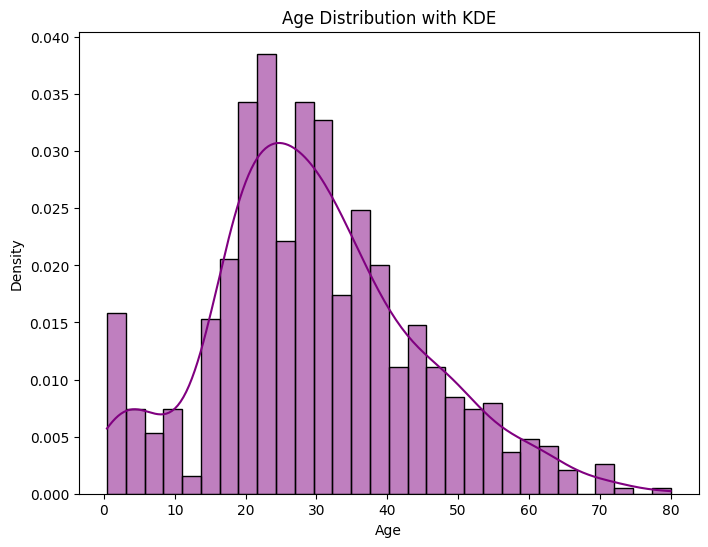

In [13]:
# Histogram with KDE for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='purple', stat='density')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


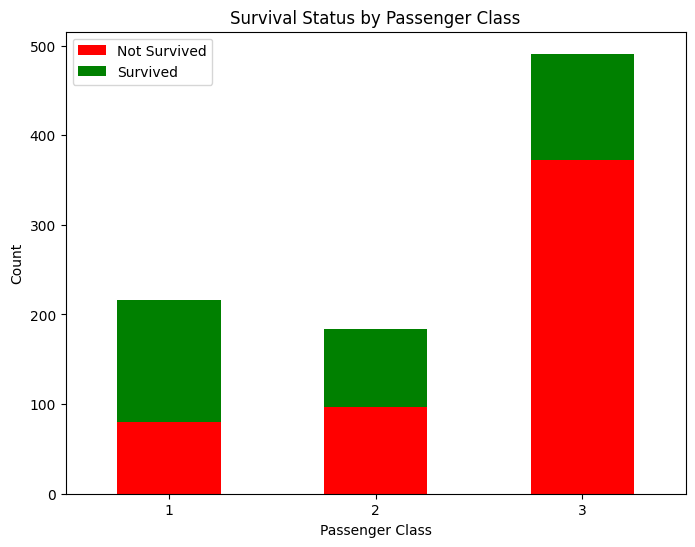

In [14]:
# Create a stacked bar plot for survival status by Passenger Class
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

plt.title('Survival Status by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.show()


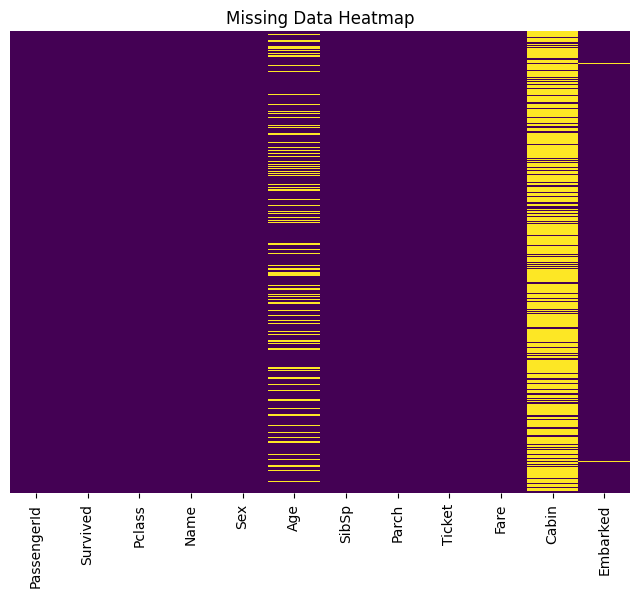

In [16]:
# Heatmap to visualize missing values in the dataset
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()



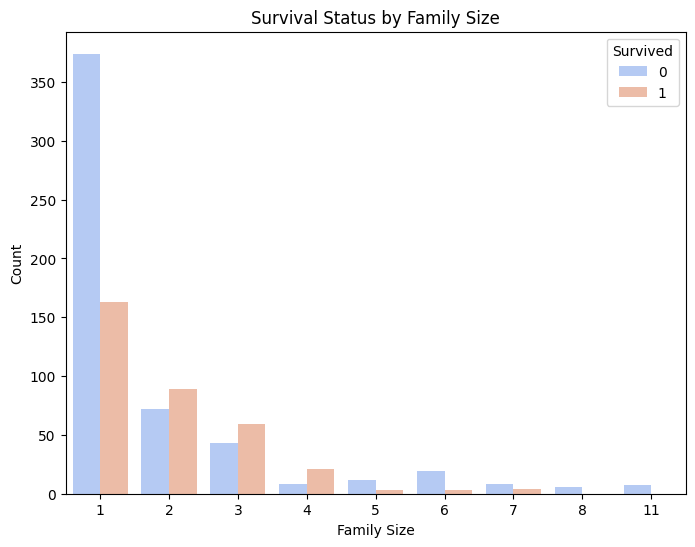

In [17]:
# Create a new column for family size (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Including the passenger themselves

# Count plot for Family Size by Survival Status
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Status by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


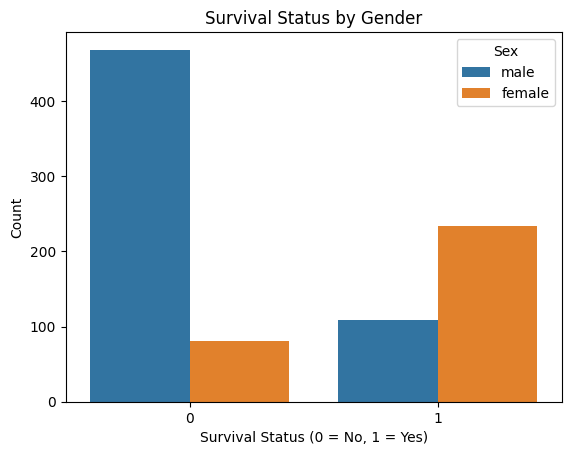

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Status by Gender')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
